

# Análise de Dados: Séries Temporais


# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura foram extraídos diretamento do https://portal.inmet.gov.br do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [32]:
#!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [50]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0])

In [51]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [52]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [53]:
energia.shape

(204, 4)

Responda:

 - Qual é a granularidade da base de dados: **?** 
 - Qual é o intervalo de tempo (min/max): **?**

- A granularidade é mensal.
- O intevarla ta entre janeiro de 2004 a dezembro de 2020

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [54]:
#!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [55]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0])

In [56]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [57]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


In [58]:
temperatura.shape

(901, 4)

Responda:

 - Qual é a granularidade da base de dados: **?**
 - Qual é o intervalo de tempo (min/max): **?**

-  Granularidade diaria
- O intervalo vai de mês 7 de 2018 a dezembro de 2020

## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [59]:
energia = energia.set_index(keys = ['referencia'])

In [60]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [61]:
energia = energia.loc['2019-01':'2020-12']

In [62]:
energia.shape

(24, 3)

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [63]:
temperatura = temperatura.set_index(keys= ['referencia'])

In [64]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [65]:
temperatura = temperatura.loc['2019-01':'2020-12']

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [66]:
temperatura.isnull().sum()

temp-media-sp     0
temp-media-rj    87
temp-media-mg     7
dtype: int64

In [67]:
temperatura.dropna(inplace=True)

In [68]:
temperatura.isnull().sum()

temp-media-sp    0
temp-media-rj    0
temp-media-mg    0
dtype: int64

In [69]:
temperatura.tail()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2020-12-27,20,24.0,23.0
2020-12-28,21,25.0,23.0
2020-12-29,22,27.0,23.0
2020-12-30,24,27.0,23.0
2020-12-31,23,29.0,24.0


In [70]:
temperatura.shape

(643, 3)

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [71]:
temperatura['temp-media'] = temperatura[['temp-media-sp', 'temp-media-rj','temp-media-mg']].mean(axis=1)

In [72]:
temperatura.tail()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2020-12-27,20,24.0,23.0,22.333333
2020-12-28,21,25.0,23.0,23.000000
2020-12-29,22,27.0,23.0,24.000000
2020-12-30,24,27.0,23.0,24.666667
2020-12-31,23,29.0,24.0,25.333333


In [73]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [74]:
temperatura = temperatura.resample(rule='M').mean()

In [75]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [76]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-31,24.000000,29.774194,24.483871,26.086022
2019-02-28,21.928571,27.464286,23.571429,24.321429
2019-03-31,21.258065,26.645161,23.032258,23.645161
2019-04-30,20.833333,26.066667,22.600000,23.166667
2019-05-31,19.161290,24.193548,21.225806,21.526882


## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

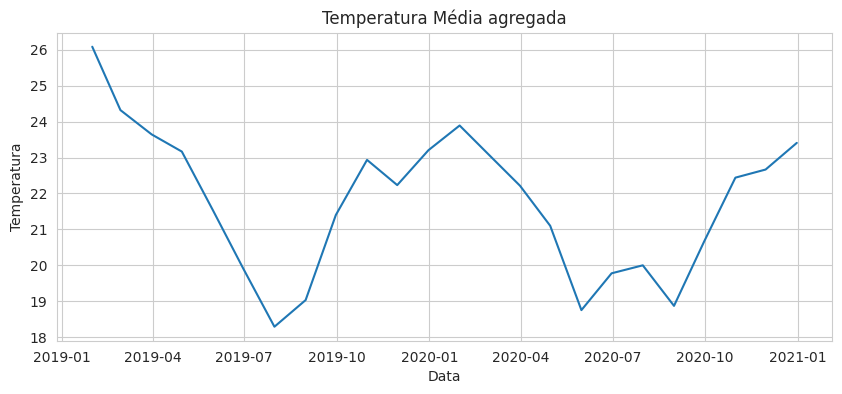

In [77]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=temperatura, x='referencia', y = 'temp-media', markers='1')
    grafico.set(title = 'Temperatura Média agregada', ylabel = 'Temperatura', xlabel = 'Data')
    grafico.figure.set_size_inches(10,4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

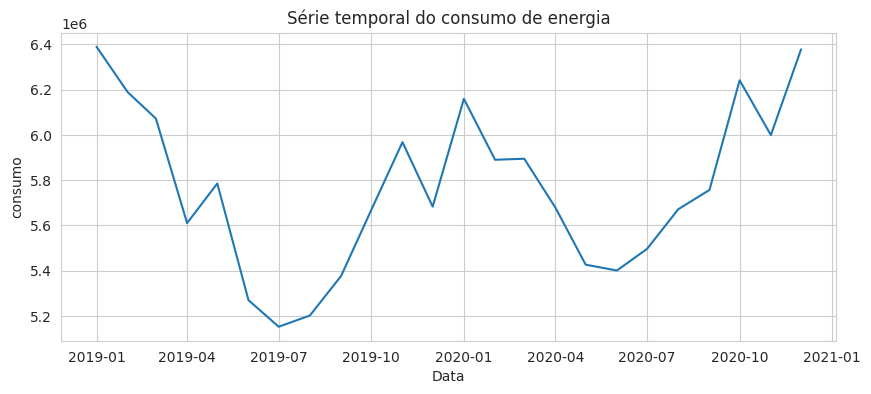

In [78]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=energia, x='referencia', y = 'residencial', markers='1')
    grafico.set(title = 'Série temporal do consumo de energia', ylabel = 'consumo', xlabel = 'Data')
    grafico.figure.set_size_inches(10,4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [79]:
correlacao = np.corrcoef(energia['residencial'], temperatura['temp-media'])[0,1]

In [80]:
correlacao

0.824271822739731

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Sim, uma correlação de 0.82 indica uma forte relação positiva entre os dados. 

### **3.2. Consumo comercial** 

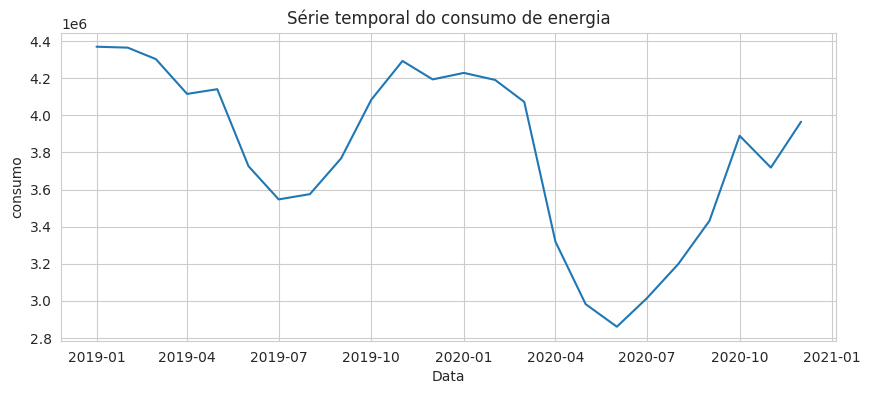

In [81]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=energia, x='referencia', y = 'comercial', markers='1')
    grafico.set(title = 'Série temporal do consumo de energia', ylabel = 'consumo', xlabel = 'Data')
    grafico.figure.set_size_inches(10,4)

### **3.3. Consumo industrial** 

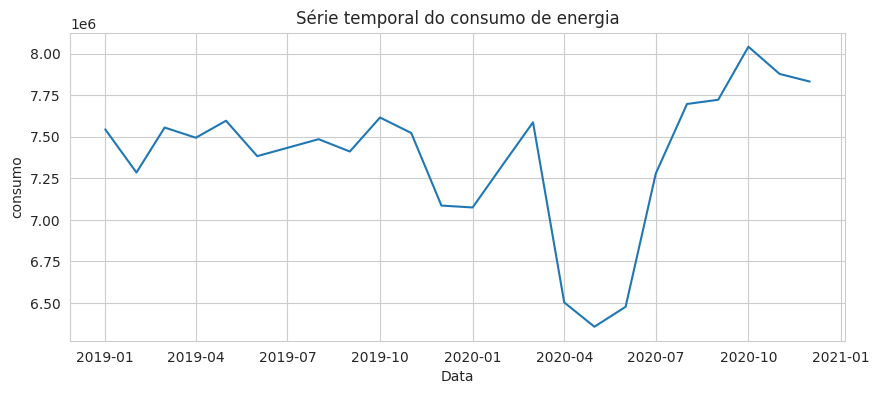

In [82]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=energia, x='referencia', y = 'industrial', markers='1')
    grafico.set(title = 'Série temporal do consumo de energia', ylabel = 'consumo', xlabel = 'Data')
    grafico.figure.set_size_inches(10,4)

---